<a href="https://www.kaggle.com/code/sandhyakrishnan02/mnsit-cnn-with-augmentation?scriptVersionId=95088387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Content

[1. Introduction](#1)

[2. Tensor](#2)

[3. RGB Format](#3)

[4. Convolutional Neural Network (CNN)](#4)

* [4.1. Abstract Structure of CNN](#4.1)

* [4.2 The LeNet-5 Architecture](#4.2)

* [4.3 Convolution](#4.3)

* [4.4 Non - Linear Activation Function](#4.4)

* [4.5 Pooling](#4.5)

* [4.6 Fully Connected layer](#4.6)

[5. Importing Libraries and Data File](#5)

[6. MNIST Data Analysis](#6)

[7. Model Creation](#7)

[8. Model Plot](#8)

[9. Model Summary Interpretation](#9)

[10. Evaluation of Validation Model](#10)

[11. Image output in Different Layers](#11)

[12. Augmentation](#12)

[13. Reference](#13)


# 1. Introduction

MNIST ("Modified National Institute of Standards and Technology") classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

In this notebook CNN is used to identify digits from a dataset of tens of thousands of handwritten images. The efficency of CNN is increased by using augmentation.

# 2. Tensor

A tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space and  CNN takes a order 3 tensor as an input.

* A scalar value ---> order 0 tensor - eg. A single number
* A Vector ---> order 1 tensor - eg. A array
* A matrix ---> order 2 tensor -eg.  Gray scale Image
* A color Image --->order 3 tensor - eg. Color Image


# 3. RGB Format 

An RGB image has three channels: 
* Red
* Green
* Blue

If the RGB image is 24-bit (the industry standard as of 2005), each channel has 8 bits(total 8 * 3 =24), for red, green, and blue, where each image can store discrete pixels with conventional brightness intensities between 0 and 255.

In each channel, the corresponding color of that channel will be brighter, that red will be brighter in red channel, green will brighter in green channel and blue will be brighter in blue channel.



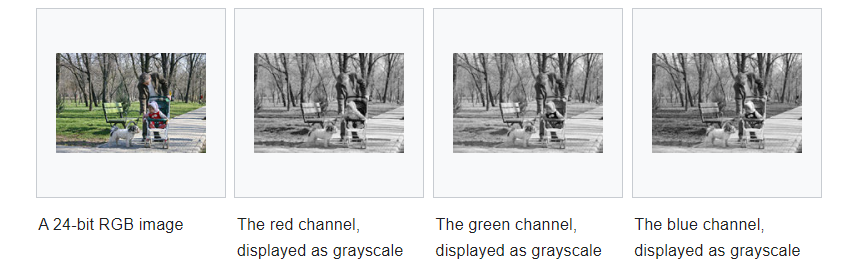

In the above picture, the grey trees have similar brightness in all channels, whereas the red dress is much brighter in the red channel than in the other two, and the green grass is much brighter in the green channel.

A color triangle can be made with the three primary colors based on the additive combination like below where white will the center color. The color outside the color triangle will be grayscale.

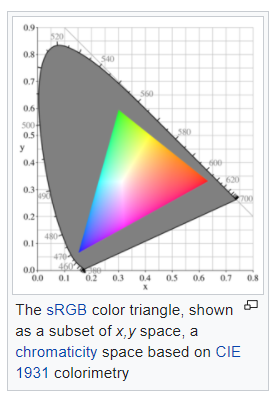

<a id="4"></a> <br>
# 4. Convolutional Neural Network (CNN)

The Convolutional Neural Network (CNN) are used to recognize visual patterns from pixel images with variability.

Some areas where CNN are used: 
* Image Classification
* Image Sematic Segmentation
* Objection Detection in Image


A color Image with H rows and W columns is a tensor with H * W * 3 [3- represents 3 channels] and gray scale can be represend in 3D as H * W * 1. Each color image will have a brightness and its value will be ranging from 0 to 255. Color image with value 255 will be brightest and with 0 wil be dark.

However, tensor greater than 3 order are also widely used in CNN.

<a id="4.1"></a> <br>
##  4.1 Abstract Structure of CNN

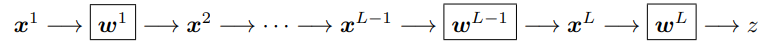

The input x1 an image goes through processing in the first layer, which is the first box. The parameters involved in the first box and collectively called w1 tensor and it will give output x2 which will be input to second layer processing, second box. It will continue till it gets the output xl. There will be one additional layer for back error propagation. If the CNN is used to handle an image classification problem with C classes, then xl will have C dimensional vector and a softmax transformation can be used in (L-1)th layer to make its output as a probability mass function.

The last layer, wL is the loss layer. If t is the target for input x1, then t is converted to C dimensional vector and it will be a probability mass function, and distance between xL and t can be measured using cross-entropy loss.

There the loss function will be


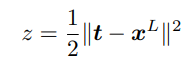

In CNN, the prediction is done by using only forward propagation and loss layer is not needed for prediction, it is useful when we learn CNN parameters using a set of training examples. The output prediction will be.

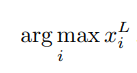

<a id="4.2"></a> <br>
## 4.2 The LeNet-5 Architecture

The LeNet-5 Architecture designed by LeCun et al, for handwritten and machine-printed character recognition. 

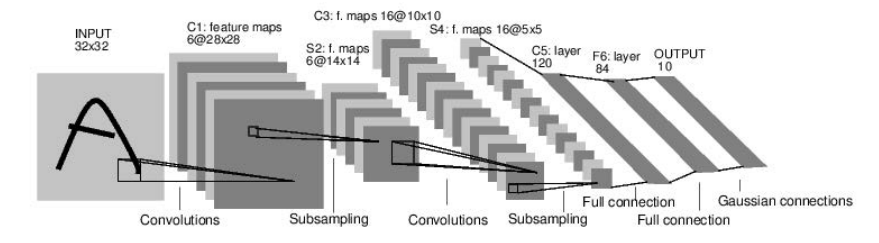

* The input image is an 8-bit image of size 32 * 32
* 2 convolution/pooling layers 
    * C1/S2 - C1 has 6 Filters of size 5 by 5
    * C3/S4 - C3 has 16 Filters of size 5 by 5
* Fully connected layers denoted by C5 and F6

<a id="4.3"></a> <br>
## 4.3 Convolution

The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels or feature detecors), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the filter entries and the input, producing a 2-dimensional activation map of that filter. As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input.

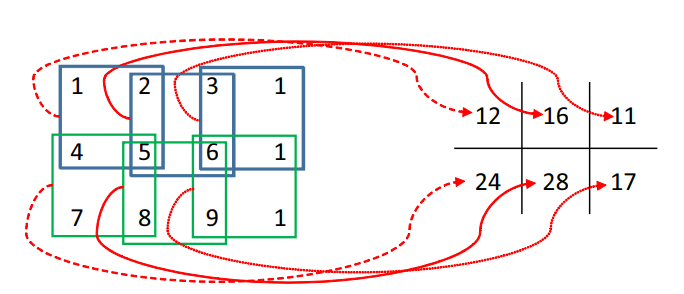

The convolution input is the image broken down into pixel.

Let us take a input image which is broken down to 3 * 4 matrix as above and if a 2 * 2  filter(kernel or feature detector.) with all values 1. 

Kernel detects features like edges or convex shapes and best weights for the kernel is learnt by network using back-propagation like any other neurons.. The Kernel will over lap the convolution input and will produce an output of matrix 2 * 3, which is called a feature map. This type of multiplication is called dot product. 

When kernel overlap convolution of top left, then the convolution result will be 1 * 1 + 1* 4+ 1* 2 + 1* 5 =12 an it will continue till it reaches right bottom border.

The convolution will reduce the size of input image and in case if input image and feature map is required to be of same size, padding is to be used.

<a id="4.4"></a> <br>
## 4.4 Non - Linear Activation Function

CNN uses non-linear activation function, if the nonlinear operation between every two convolutional layers is removed, the cascade of two linear systems is equivalent to a single linear system. Then, we can simply go with one linear system and the necessity of a multi-layer network architecture is not obvious. 

The 3 activation function adopted by CNN are :
* Sigmoid : Clips input to interval -1 and 1.
* ReLU    : Clips negative value to zero and keeps positive unchanged.
* PReLU   : Similar operation as ReLU, apart from mapping larger negative values to smaller one by reducing slope.


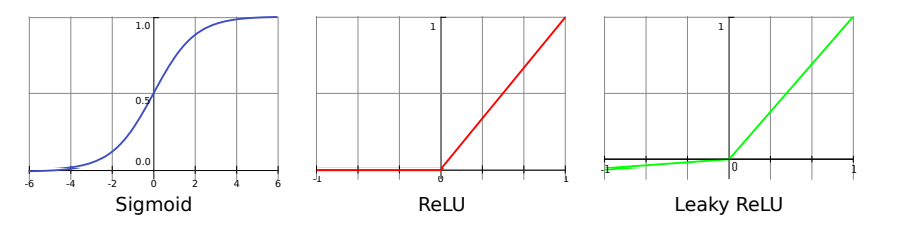

However, ReLU is most commonly used in CNN. Sigmoid function does not perform well as ReLU in CNN, because after several sigmoid layers, the gradient will vanish which will lead to difficulty in gradient based learning. Whereas ReLU, significantly reduce diffculty in learning CNN parameters and improves accuracy by backpropagating gradient of activated features without any change which is beneficial for gradient based learning.

<a id="4.5"></a> <br>
## 4.5 Pooling

The purpose of the pooling layers is to achieve spatial invariance by reducing the resolution of the feature maps. Each pooled feature map corresponds to one feature map of the previous layer. Also pooling removes noise in the data, helps to reduce overfitting and speed up the computation.

Max pooling and subsampling are the commonly used pooling operations. The subsampling function takes the average over the inputs, multiplies it with a trainable scalar, adds a trainable bias, and passes the result through the non-linearity. Whereas the max pooling function applies a window function to the input patch, and computes the maximum in the neighborhood. 

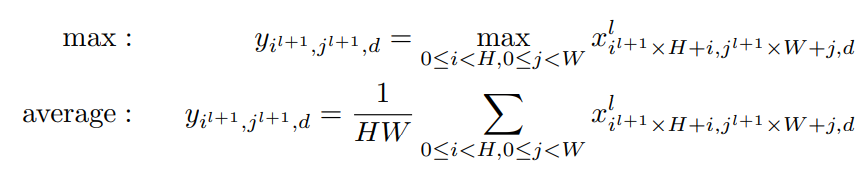


Max pooling operation is vastly superior for capturing invariances in image-like data, compared to a subsampling operation, so it is commonly used in CNN as pooling layer.

<a id="4.6"></a> <br>
## 4.6 Fully Connected layer

In fully Connected layers, every neurons have connections to all activations in the previous layer. Before the data is fed to fully connected layer, flattening of data is to be done. Flattening will convert the pooled data into 1D linear array.

Fully connected layer can be considered as the hidden layer in ANN, but here neuron will be fully connected to previous layer. Fully connected layer will be followed by a output layer which uses softmax activation function.



<a id="5"></a> <br>
# 5. Importing Libraries and Data File

In [1]:
pip install visualkeras

     |████████████████████████████████| 992 kB 291 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from itertools import product

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import visualkeras 

import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
x_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
x_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

<a id="6"></a> <br>
# 6. MNIST Data Analysis

In [4]:
x_train.head().style.background_gradient(cmap='Dark2_r')

In [5]:
x_train.describe().style.background_gradient(cmap='Dark2_r')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
          text-align:center;">Missing Data Check</p>    

</div>


In [6]:
x_train.isnull().sum().sum()

0

In [7]:
x_test.isnull().sum().sum()

0

**There is no missing Data in the dataset**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
          text-align:center;">Analysis and Visualization Of Target</p>         

</div>


In [8]:
y_train = x_train['label']
x_train = x_train.drop(['label'], axis=1)

In [9]:
pd.Series(y_train).value_counts().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [10]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


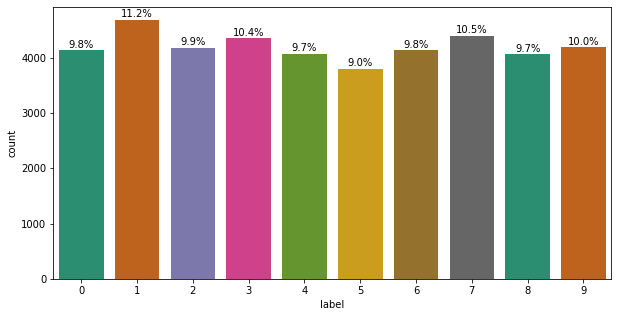

In [11]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = y_train, palette = 'Dark2')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

**There are 10 classes in the output from 0 top 9.**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
          text-align:center;">Reshaping and Normalizing</p>         

</div>


To input images to keras, the pixel format should be (H * W * D )[ (image_height, image_width, color_channels)] so we will reshape the data into ( 28 * 28 * 1) The maximum brightness of the pixel is 255 and to normalize we have to divide by 255, then all values of training and test set will lie between 0 and 1.

In [12]:
print("Shape of training data", x_train.shape)
print("\nShape of test data", x_test.shape)

Shape of training data (42000, 784)

Shape of test data (28000, 784)


In [13]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

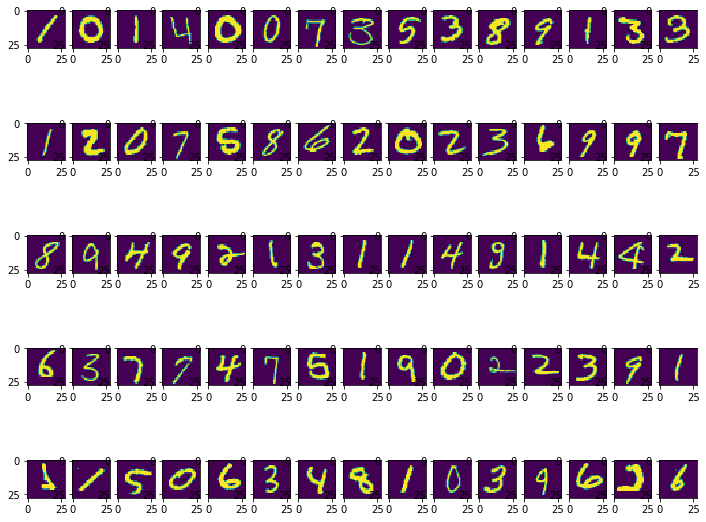

In [14]:
plt.figure(figsize=(12,10))
x, y = 15, 5
for i in range(75):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i],interpolation='nearest')
plt.show()

In [15]:
x_train = x_train/255
x_test = x_test/255

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
          text-align:center;">One Hot Encoding</p>         

</div>


The ouput class is from 0 to 9, we have one hot encode it,else NN will consider it as normal classification problem. Either we can use to_categorical() from keras's utils.np_utils or get_dummies() from pandas(when using get_dummies() y_train is to be converted to dataframe).

to_categorical() will convert class vector into a matrix from integers from 0 to number of classes. If we does not pass number of classes as a parameter, it will convert the matrix from 0 to largest number in y + 1. Here I have taken the number of classes in a variable K, so it can passed as num_class parameter.

In [16]:
y_categ_train = to_categorical(y_train,K)

In [17]:
y_train.head(1)

0    1
Name: label, dtype: int64

In [18]:
print("\n Encoded y_train first row",y_categ_train[1])


 Encoded y_train first row [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
from sklearn.model_selection import train_test_split
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_categ_train, test_size = 0.1, random_state=42)

<a id="7"></a> <br>
# 7. Model Creation

* Sequential() ----> A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
* Conv2D() ----> Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
    * input_shape : Here only a single Conv2D layer is used, so we have to provid input shape in parameter input_shape without the sample axis here it will be (28, 28,1). In case the dimension has variable size then None is to provided.
    * filters : It is an integer value and the dimensionality of the output space.
    * kernel_size : It specifies the height and width of the 2D convolution window.
    * activation : ReLU, as it is most efficient activation function.
* MaxPool2D ---> Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.
    * pool_size ---> In this parameter window size is to be mentioned over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window.
* Flatten() --- > It will flattens the input to  that is equal to the number of elements contained in tensor without affecting the batch size.
* Dense() ----> For fully connected layer, 128 neurons are using here and for output layer 10 neurons as the number of classes in output is 10.


In [20]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',)) 
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

<a id="8"></a> <br>
# 8. Model Plot

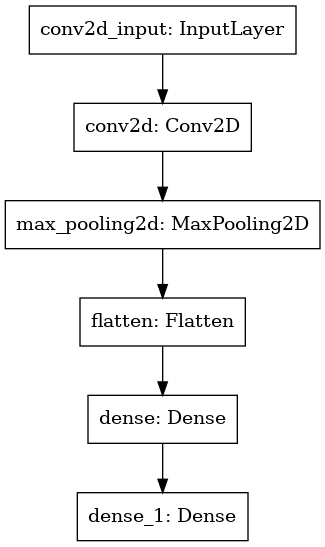

In [21]:
plot_model(model, to_file='model.png')

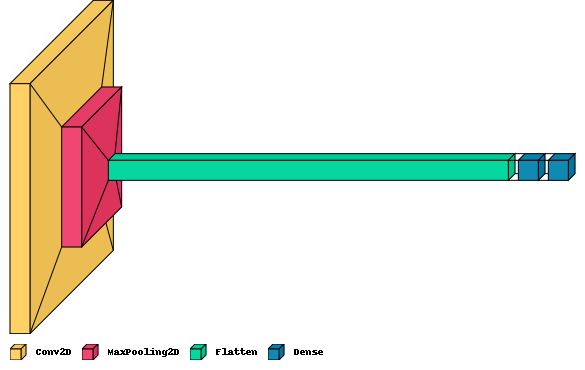

In [22]:
visualkeras.layered_view(model, scale_xy=10, legend=True)

> <a id="9"></a> <br>
# 9. Model Summary Interpretation

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


Output Shape

* Input Image : The size of each input image is (28,28,1), but as batch size varies, Keras appends None and the size of input image will be (None,28,28,1).
* Conv2D Layer : Conv2D operates on a 2D window on the height, width dimensions. So here the convolution will be done for a (28, 28) image with kernel_size (4, 4) and stride =1, so the output size will be (28 - 4 + 1, 28 - 4 + 1) = (25, 25). By 32 filters and with varing batch size the output shape of conv2D layer will be (None, 25,25,32).
* MaxPool2D Layer : Here the pool_size is (2, 2) and stride is not mentioned. When stride is not mentioned it will take the value of pool_size, so hee stride will be (2,2). So the output shape will be (None, (25 - 2)//2 + 1, (25 - 2)//2) + 1),32) = (None, 12, 12, 32)
* Flatten : It will create a 1D array vector with shape (None, 12 * 12* 32)) = (None, 4608)
* Dense : Dense output is specified in the model.

Param 

*  Conv2D layer =  (4 * 4 * 1 * 32) + 32  = 544


<a id="10"></a> <br>
# 10. Evaluation of Validation Model

In [24]:
model.fit(x_train1,y_train1,validation_data = (x_val,y_val),epochs=1)

2022-05-08 17:40:01.927958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1182/1182 [==============================] - 16s 12ms/step - loss: 0.1646 - accuracy: 0.9513 - val_loss: 0.0976 - val_accuracy: 0.9700


In [25]:
score = model.evaluate(x_val, y_val, verbose = 10 )
print ( 'Loss is :', score[0], '\nTraining Accuracy is :', score[1] )

Loss is : 0.09759076684713364 
Training Accuracy is : 0.9700000286102295


In [26]:
predict_y=model.predict(x_val)
y_val_hat=np.argmax(predict_y,axis=1)
y_val_org = np.argmax(y_val, axis = 1) 

## Filters used inModel

In [27]:
layers = model.layers
filters, biases = model.layers[0].get_weights()
layer_outputs = model.layers[0].output
model_Input = model.input
print('Layer Name is :', layers[0].name, '\nFitler Shaper:',filters.shape)

Layer Name is : conv2d 
Fitler Shaper: (4, 4, 1, 32)


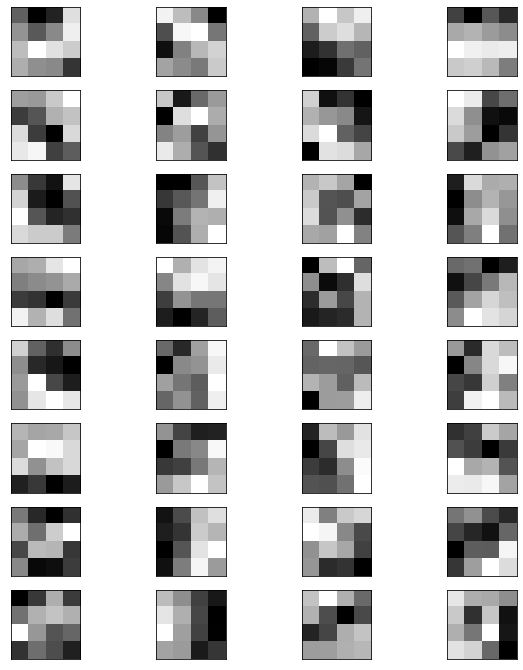

In [28]:
f = plt.figure(figsize = (10,12))
columns = 4
rows = 8
n_filters = columns * rows
for i in range(1, n_filters + 1):
    fil = filters[:,:,:,i-1]
    f = plt.subplot(rows, columns, i)
    f.set_xticks([])
    f.set_yticks([])
    plt.imshow(fil[: ,: ,0], cmap = 'gray')

plt.show()


## Confusion Matrix

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

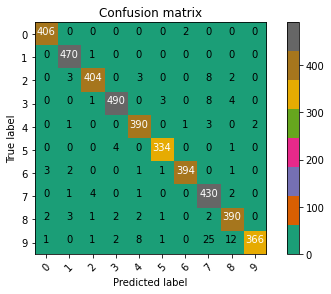

In [30]:
confusion_mtx = confusion_matrix(y_val_org, y_val_hat) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Classification Report

In [31]:
print(classification_report(y_val_org,y_val_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       408
           1       0.98      1.00      0.99       471
           2       0.98      0.96      0.97       420
           3       0.98      0.97      0.98       506
           4       0.96      0.98      0.97       397
           5       0.98      0.99      0.98       339
           6       0.99      0.98      0.99       402
           7       0.90      0.98      0.94       438
           8       0.95      0.97      0.96       403
           9       0.99      0.88      0.93       416

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



**Classification Report looks good :)**

<a id="11"></a> <br>
# 11. Image Output In Different Layers

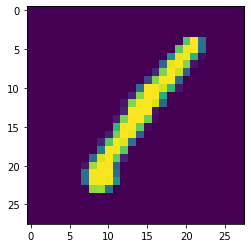

In [32]:
test_im = x_train[0]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')

## First Activation Layer

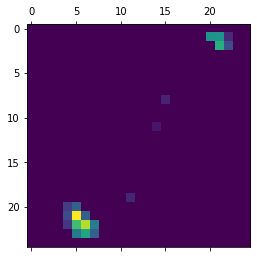

In [33]:
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

## Conv2D Layer

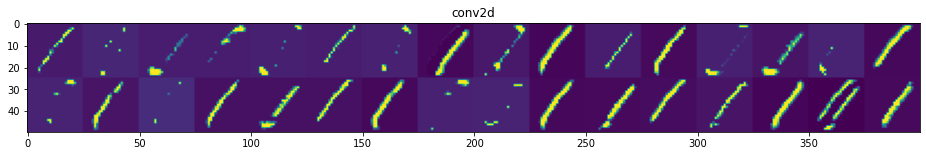

In [34]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

## MaxPooling

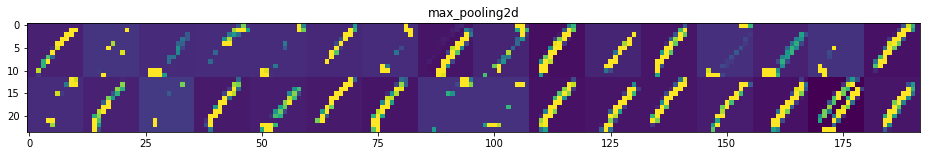

In [35]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

<a id="12"></a> <br>
# 12. Augmentation

Augmentation is a technique to increase the diversity of training set by applying random (but realistic) transformations, such as image rotation, zoom in zoom out, horizontal or vertical flip etc to overcome limited quantity and limited diversity of images. 

In [36]:
datagen  =  ImageDataGenerator(   
    rotation_range=15,
    width_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.0,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(x_train)

Here augmention techinque used are :
* rotation_range = 15 --> The image will be rotationed randomly with 15 degree.
* width_shift_range=0.15 --> The possible values are floats in the interval [-1.5, +1.5)] . Here the image will be shiftede to the left or right(horizontal shifts) randomly between the range. Positive value will shift image towards right side and vice versa.
* shear_range=0.2 --> Here the image will be distorted along x - axis with counter-clockwise direction in degrees. 
* zoom_range=0.2 --> It will zoom the image and random zoom will be in range of Range  [lower, upper] = [1-zoom_range, 1+zoom_range].
* validation_split=0.0 --> Fraction of images reserved for validation and its value should be strictly between 0 and 1. 
* horizontal_flip=True --> Its value is boolean and when true will randomly flip inputs horizontally.



In [37]:
checkpoint_callback = ModelCheckpoint(filepath='CNN-logo.h5',
                      monitor='val_accuracy', mode='max', save_best_only=True)
earlystopping_callback = EarlyStopping(monitor='loss', patience=3)

In [38]:
batch_size = 100
steps = x_train.shape[0]//batch_size

In [39]:
train_generator = datagen.flow(x_train1, y_train1, batch_size)
Val_generator = datagen.flow(x_val, y_val, batch_size)

In [40]:
h = model.fit_generator(train_generator, validation_data = Val_generator,epochs=1, steps_per_epoch = steps,callbacks=[checkpoint_callback, earlystopping_callback])

420/420 [==============================] - 21s 48ms/step - loss: 0.4767 - accuracy: 0.8518 - val_loss: 0.2820 - val_accuracy: 0.9179


In [41]:
res = model.predict(x_test)
res = np.argmax(res,axis = 1)
res = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1 ,28001) ,name = "ImageId"),   res],axis = 1)
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,9
6,7,0
7,8,3
8,9,0
9,10,3


In [42]:
submission.to_csv('submission.csv',index=False)

<a id="13"></a> <br> 
# 13. Reference


https://en.wikipedia.org/wiki/Channel_(digital_image)

https://en.wikipedia.org/wiki/SRGB

https://en.wikipedia.org/wiki/Convolutional_neural_network

https://cs.nju.edu.cn/wujx/paper/CNN.pdf

https://www.semanticscholar.org/paper/Understanding-convolutional-neural-networks-with-a-Kuo/52d7ae292f285ab24b050b8d229ac98cd674523c#citing-papers
